In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
dataset = pd.read_csv('Users_Data_U_01.csv')
dataset.head()

,Age,Gender,BMI,Hyper_hist,Time,Hr,Sbp,Dbp,Activity,Mood
0,46,Female,32,Yes,02/07/2021 10:00,73,118,77,Seated / Resting,Nervous
1,46,Female,32,Yes,02/07/2021 10:00,73,118,77,Travelling,Calm
2,46,Female,32,Yes,02/07/2021 10:00,87,122,79,Seated / Resting,Nervous
3,46,Female,32,Yes,02/07/2021 10:00,87,122,79,Travelling,Calm
4,46,Female,32,Yes,02/07/2021 09:00,70,117,76,Housework,Relaxed


In [3]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

X = np.reshape(['male', 'male', 'female'], (-1, 1))

OrdinalEncoder().fit_transform(X)

array([[1.],
       [1.],
       [0.]])

In [4]:
dataset.isnull().sum()

Age           0
Gender        0
BMI           0
Hyper_hist    0
Time          0
Hr            0
Sbp           0
Dbp           0
Activity      6
Mood          0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         5953 non-null   int64 
 1   Gender      5953 non-null   object
 2   BMI         5953 non-null   int64 
 3   Hyper_hist  5953 non-null   object
 4   Time        5953 non-null   object
 5   Hr          5953 non-null   int64 
 6   Sbp         5953 non-null   int64 
 7   Dbp         5953 non-null   int64 
 8   Activity    5947 non-null   object
 9   Mood        5953 non-null   object
dtypes: int64(5), object(5)
memory usage: 465.2+ KB


In [6]:
dataset.describe()

,Age,BMI,Hr,Sbp,Dbp
count,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000
mean,47.915337,29.674114,74.507475,119.026037,77.470351
std,7.666557,5.992039,11.592863,5.183932,4.186613
min,35.000000,18.000000,46.000000,108.000000,70.000000
25%,40.000000,26.000000,67.000000,116.000000,75.000000
50%,47.000000,30.000000,73.000000,118.000000,77.000000
75%,56.000000,33.000000,79.000000,120.000000,78.000000
max,60.000000,42.000000,146.000000,143.000000,101.000000


In [7]:
df=dataset.drop(['Time'],axis=1)
df.head()

,Age,Gender,BMI,Hyper_hist,Hr,Sbp,Dbp,Activity,Mood
0,46,Female,32,Yes,73,118,77,Seated / Resting,Nervous
1,46,Female,32,Yes,73,118,77,Travelling,Calm
2,46,Female,32,Yes,87,122,79,Seated / Resting,Nervous
3,46,Female,32,Yes,87,122,79,Travelling,Calm
4,46,Female,32,Yes,70,117,76,Housework,Relaxed


In [8]:
df.corrwith(df['Hr'])*100

/tmp/ipykernel_18110/1792018962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Hr'])*100


Age     -7.051867
BMI      4.057637
Hr     100.000000
Sbp     96.301410
Dbp     95.276845
dtype: float64

/tmp/ipykernel_18110/3271419208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corrwith(df['Hr'])*100).plot(kind='bar')


<AxesSubplot: >

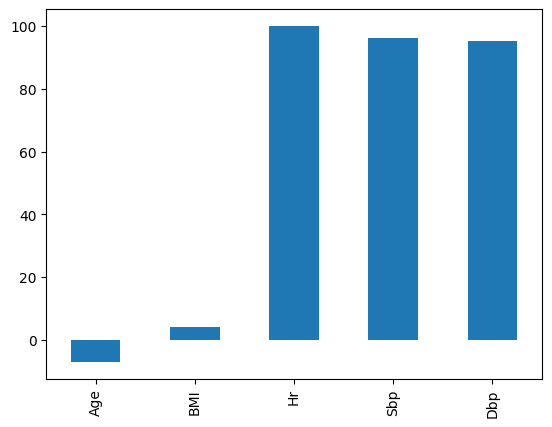

In [9]:
(df.corrwith(df['Hr'])*100).plot(kind='bar')

In [10]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Hyper_hist', 'Hr', 'Sbp', 'Dbp', 'Activity',
       'Mood'],
      dtype='object')

In [11]:
df.groupby('Hr').mean()

/tmp/ipykernel_18110/2403812855.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Hr').mean()


,Age,BMI,Sbp,Dbp
Hr,,,,
46,40.0,23.0,109.0,70.2
47,40.0,23.0,109.0,71.0
48,40.0,23.0,108.0,71.0
49,40.0,23.0,110.0,71.0
50,40.0,23.0,110.0,71.0
...,...,...,...,...
130,35.0,28.0,141.0,100.0
133,40.0,30.0,141.0,99.0
134,56.0,35.0,142.0,100.0


In [12]:
df.isnull().sum()[df.isnull().sum()>0]

Activity    6
dtype: int64

In [13]:
df[['Age', 'Gender', 'BMI', 'Hyper_hist', 'Hr', 'Sbp', 'Dbp', 'Activity', 'Mood']].cov()

/tmp/ipykernel_18110/2909966613.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Age', 'Gender', 'BMI', 'Hyper_hist', 'Hr', 'Sbp', 'Dbp', 'Activity', 'Mood']].cov()


,Age,BMI,Hr,Sbp,Dbp
Age,58.776097,17.213500,-6.267512,-2.950752,-1.832316
BMI,17.213500,35.904533,2.818633,0.875422,0.631801
Hr,-6.267512,2.818633,134.394475,57.873881,46.242451
Sbp,-2.950752,0.875422,57.873881,26.873146,21.174579
Dbp,-1.832316,0.631801,46.242451,21.174579,17.527725


/tmp/ipykernel_18110/187749020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['Age', 'Gender', 'BMI', 'Hyper_hist', 'Hr', 'Sbp', 'Dbp', 'Activity', 'Mood']].corr(),annot=True)


<AxesSubplot: >

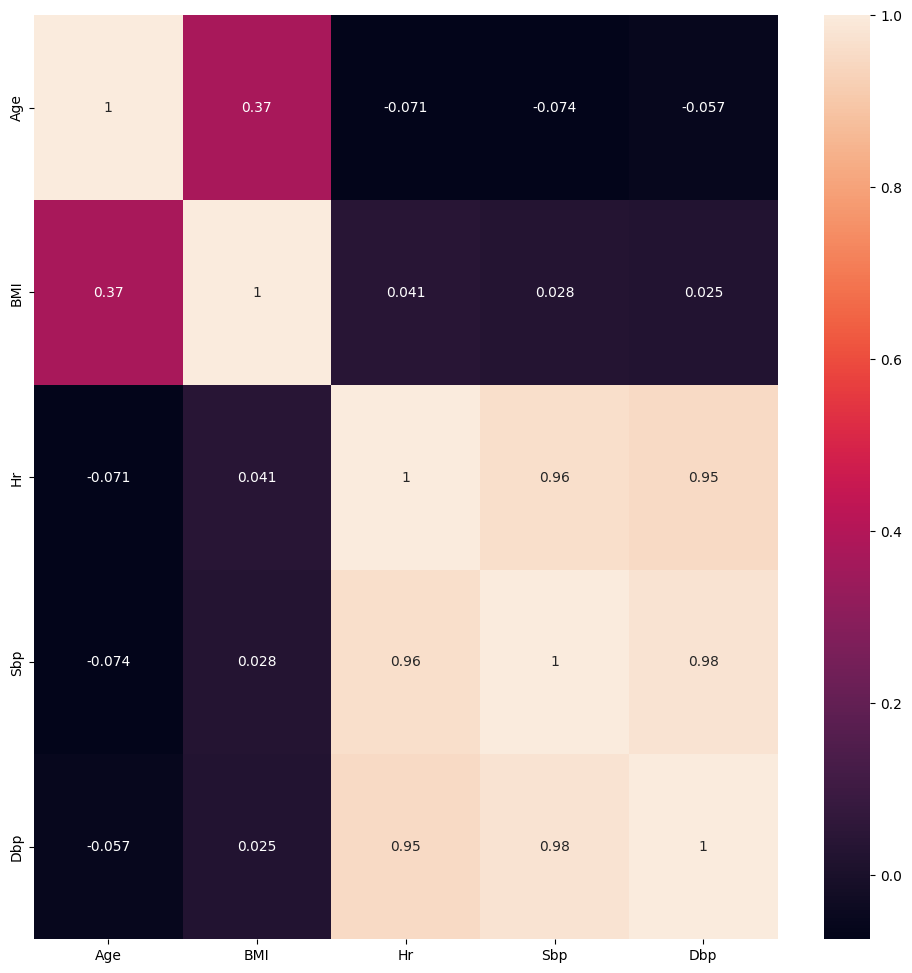

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df[['Age', 'Gender', 'BMI', 'Hyper_hist', 'Hr', 'Sbp', 'Dbp', 'Activity', 'Mood']].corr(),annot=True)

In [15]:
x=df.iloc[:,4]
y=df.iloc[:,5]
z=df.iloc[:,6]
x.head()

0    73
1    73
2    87
3    87
4    70
Name: Hr, dtype: int64

In [16]:
y.head()

0    118
1    118
2    122
3    122
4    117
Name: Sbp, dtype: int64

In [17]:
z.head()

0    77
1    77
2    79
3    79
4    76
Name: Dbp, dtype: int64

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

l_train,l_test,r_train,r_test=train_test_split(x,y,test_size=0.2,random_state=0)
l_train= l_train.values.reshape(-1, 1)
l_test = l_test.values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(l_train,r_train)

LinearRegression()

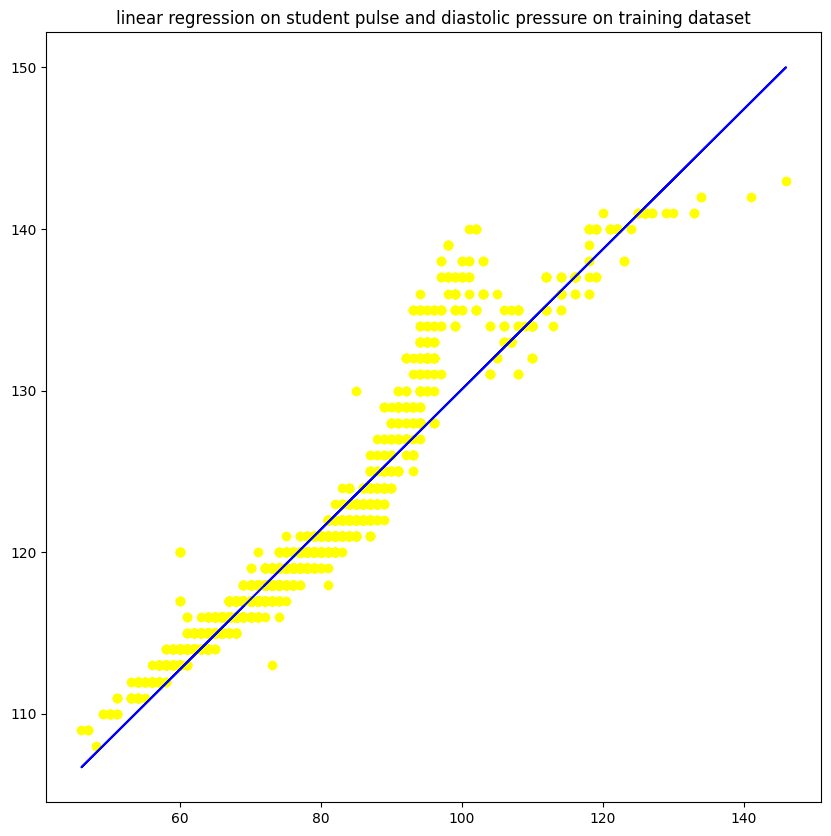

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(l_train,r_train,color='yellow')
plt.plot(l_train,lr.predict(l_train),color='blue')
plt.title('linear regression on student pulse and diastolic pressure on training dataset')
plt.show()

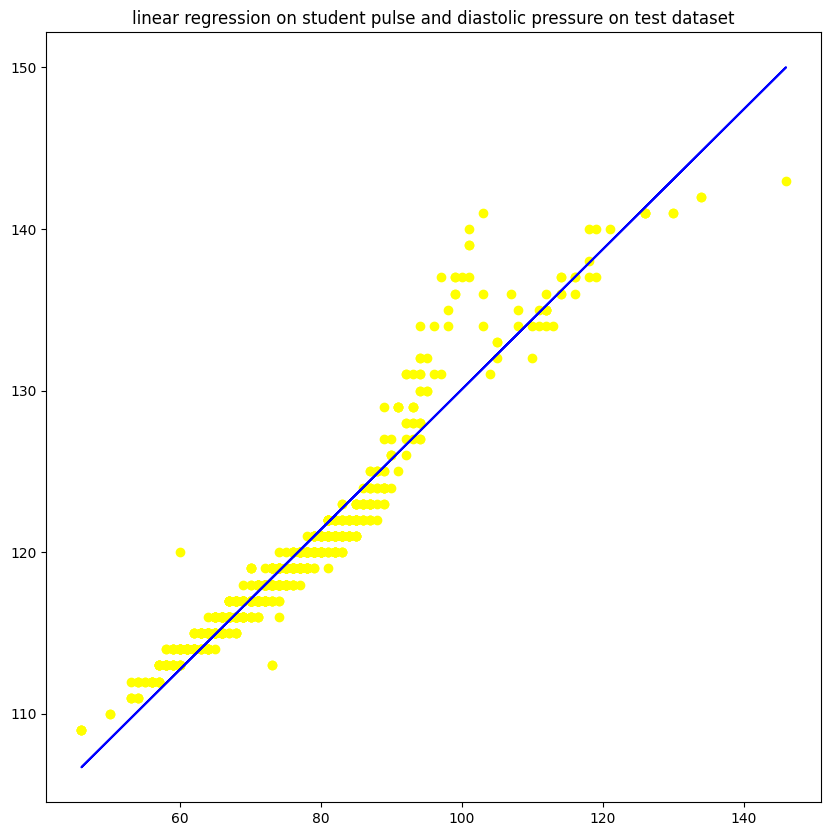

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(l_test,r_test,color='yellow')
plt.plot(l_test,lr.predict(l_test),color='blue')
plt.title('linear regression on student pulse and diastolic pressure on test dataset')
plt.show()

In [21]:
l_train,l_test,r_train,r_test=train_test_split(x,z,test_size=0.2,random_state=0)
l_train= l_train.values.reshape(-1, 1)
l_test = l_test.values.reshape(-1, 1)
lr.fit(l_train,r_train)

LinearRegression()

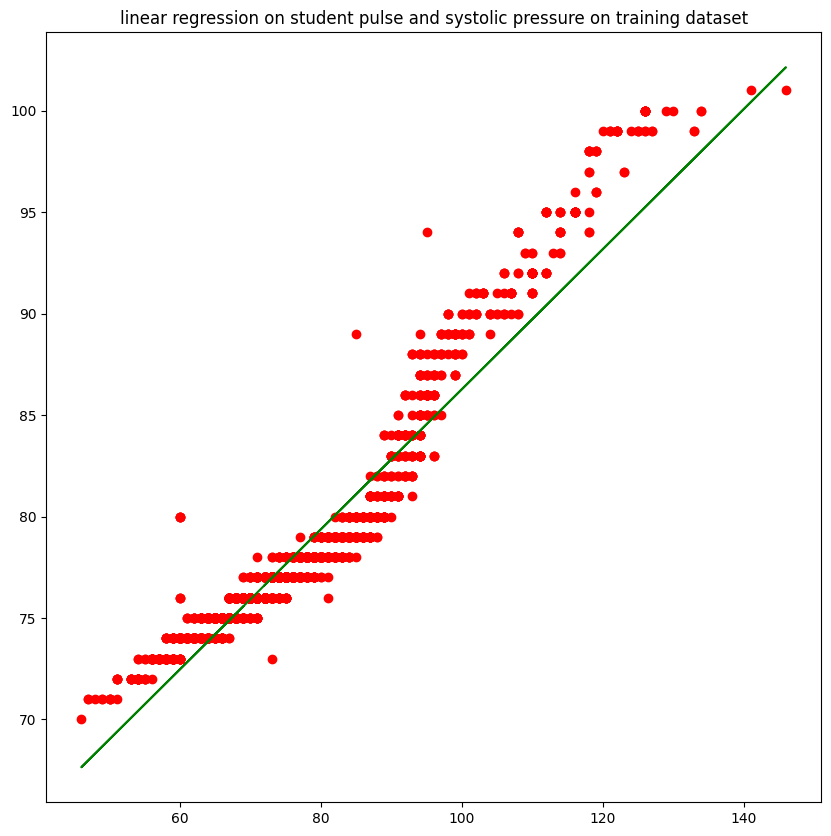

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(l_train,r_train,color='red')
plt.plot(l_train,lr.predict(l_train),color='green')
plt.title('linear regression on student pulse and systolic pressure on training dataset')
plt.show()

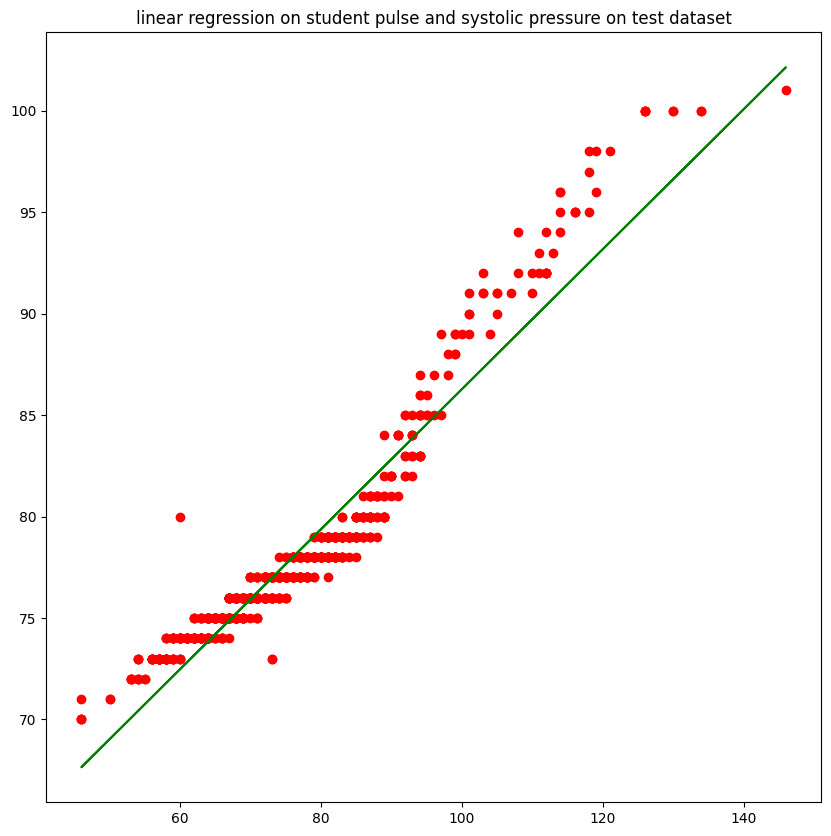

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(l_test,r_test,color='red')
plt.plot(l_test,lr.predict(l_test),color='green')
plt.title('linear regression on student pulse and systolic pressure on test dataset')
plt.show()

In [24]:
y1=df.iloc[:,5:7]
x1=df.iloc[:, 4]
y1.head()

,Sbp,Dbp
0,118,77
1,118,77
2,122,79
3,122,79
4,117,76


In [25]:
x1.head()

0    73
1    73
2    87
3    87
4    70
Name: Hr, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
pred1=lr.predict(x_test)
pred1

array([[122.285881  ,  80.0631984 ],
       [120.12013597,  78.33827299],
       [114.0560499 ,  73.50848181],
       ...,
       [117.95439095,  76.61334757],
       [123.58532802,  81.09815366],
       [117.08809294,  75.9233774 ]])

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
y_test

,Sbp,Dbp
134,121,78
1364,119,77
555,115,74
4144,116,75
2858,117,76
...,...,...
1547,117,76
2857,120,78
3957,117,76
3364,122,79


In [30]:
import numpy as np
rmse=np.sqrt(mean_squared_error(y_test,pred1))
rmse

1.3152466096524509

In [31]:
lst={
    'actual':[y_test],
    'prediction':[pred1]
}
dtf=pd.DataFrame.from_dict(lst)
print(lst)

{'actual': [      Sbp  Dbp
134   121   78
1364  119   77
555   115   74
4144  116   75
2858  117   76
...   ...  ...
1547  117   76
2857  120   78
3957  117   76
3364  122   79
5595  117   76

[1191 rows x 2 columns]], 'prediction': [array([[122.285881  ,  80.0631984 ],
       [120.12013597,  78.33827299],
       [114.0560499 ,  73.50848181],
       ...,
       [117.95439095,  76.61334757],
       [123.58532802,  81.09815366],
       [117.08809294,  75.9233774 ]])]}


In [32]:
import streamlit as st
import pickle

In [33]:
pickle.dump(lr, open('model.pkl', 'wb'))

In [34]:
model = pickle.load(open('model.pkl','rb'))